## HW for Lesson 2

In [1]:
import matplotlib
from keras import backend as K
K.set_image_dim_ordering('th')

/home/callum/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
Using cuDNN version 5103 on context None
Preallocating 4857/6071 Mb (0.800000) on cuda0
Mapped name None to device cuda0: GeForce GTX 1060 6GB (0000:01:00.0)


In [2]:
#First Layer
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Conv2D

model = Sequential()
model.add(ZeroPadding2D(padding=(1,1), input_shape=(3,224,224)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [3]:
#Second Layer
from keras.layers import MaxPooling2D

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [4]:
#Third Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))

In [5]:
#Fourth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [6]:
#Fifth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(256, (3,3), activation='relu'))

In [7]:
#Sixth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(256, (3,3), activation='relu'))

In [8]:
#Seventh Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [9]:
#Eighth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))

In [10]:
#Ninth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))

In [11]:
#Tenth layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [12]:
#Eleventh layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512,(3,3), activation='relu'))

In [13]:
#Twelveth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))

In [14]:
#Thirteenth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [15]:
#Flatten Outputs
from keras.layers import Flatten

model.add(Flatten())

In [16]:
#Fourteenth Layer
from keras.layers import Dense, Dropout

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

In [17]:
#Fifteenth Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

In [18]:
#Final Layer
model.add(Dense(1000, activation='softmax'))

In [20]:
#Import past weights
from keras.optimizers import SGD, RMSprop, Adam

fname = 'fastai/models/vgg16.h5'
model.load_weights(fname)

model.pop()
for layer in model.layers: layer.trainable=False
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Get Dogscats data
from keras.preprocessing import image

gen = image.ImageDataGenerator()
train_path="data/ltb-oh-my/train"
valid_path="data/ltb-oh-my/valid"
batch_size=16

train_batches = gen.flow_from_directory(train_path, target_size=(224,224), class_mode='categorical', shuffle=True, batch_size=batch_size)
val_batches = gen.flow_from_directory(valid_path, target_size=(224,224), class_mode='categorical', shuffle=True, batch_size=batch_size*2)

classes = list(iter(train_batches.class_indices)) # get a list of all the class labels

for c in train_batches.class_indices:
    classes[train_batches.class_indices[c]] = c

Found 3873 images belonging to 3 classes.
Found 425 images belonging to 3 classes.


In [22]:
#Fit Model
model.fit_generator(train_batches, samples_per_epoch=train_batches.samples, epochs=1, validation_data=val_batches, validation_steps=val_batches.samples)

/home/callum/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=1, validation_data=<keras.pre..., steps_per_epoch=242, validation_steps=425)`
  


Epoch 1/1
 36/242 [===>..........................] - ETA: 60s - loss: 1.0126 - acc: 0.7431

KeyboardInterrupt: 

In [ ]:
model.save_weights('vgg_ltb_by_hand.h5')

In [23]:
model.load_weights('models/ltb.h5')

In [39]:
# Get Sample Data
sample_path="data/ltb-oh-my/valid"
sample_batches = gen.flow_from_directory(sample_path, target_size=(224,224), class_mode='categorical', shuffle=True, batch_size=4)

Found 425 images belonging to 3 classes.


In [40]:
# Import some dependencies and a helper function
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
import matplotlib.pyplot as plt
%matplotlib inline
#Use the plots helper function
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [47]:
#Get a batch of images and their predictions
imgs, labels = next(sample_batches)
labels = model.predict(imgs)
indxs = np.argmax(labels, axis=1)
indxs
labels = [classes[indx] for indx in indxs]

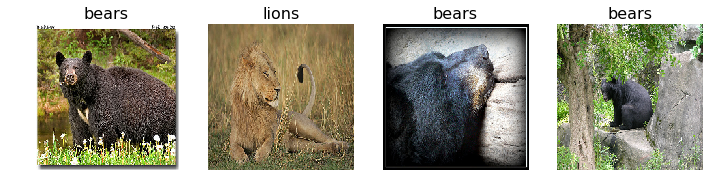

In [48]:
# Plot Images
plots(imgs, titles=labels)